Question 8: Logistic Regression with L1 Regularization<br>
Task: Implement logistic regression with L1 regularization and observe the effect on feature selection.

Feature Coefficients (L1 Regularization):
mean radius                   : 0.0000
mean texture                  : 0.0000
mean perimeter                : 0.0000
mean area                     : 0.0000
mean smoothness               : 0.0000
mean compactness              : 0.0000
mean concavity                : 0.0000
mean concave points           : -1.0339
mean symmetry                 : 0.0000
mean fractal dimension        : 0.0000
radius error                  : -0.2670
texture error                 : 0.0000
perimeter error               : 0.0000
area error                    : 0.0000
smoothness error              : 0.0000
compactness error             : 0.0000
concavity error               : 0.0000
concave points error          : 0.0000
symmetry error                : 0.0000
fractal dimension error       : 0.0000
worst radius                  : -1.7805
worst texture                 : -0.6145
worst perimeter               : 0.0000
worst area                    : 0.0000
worst smoothness  

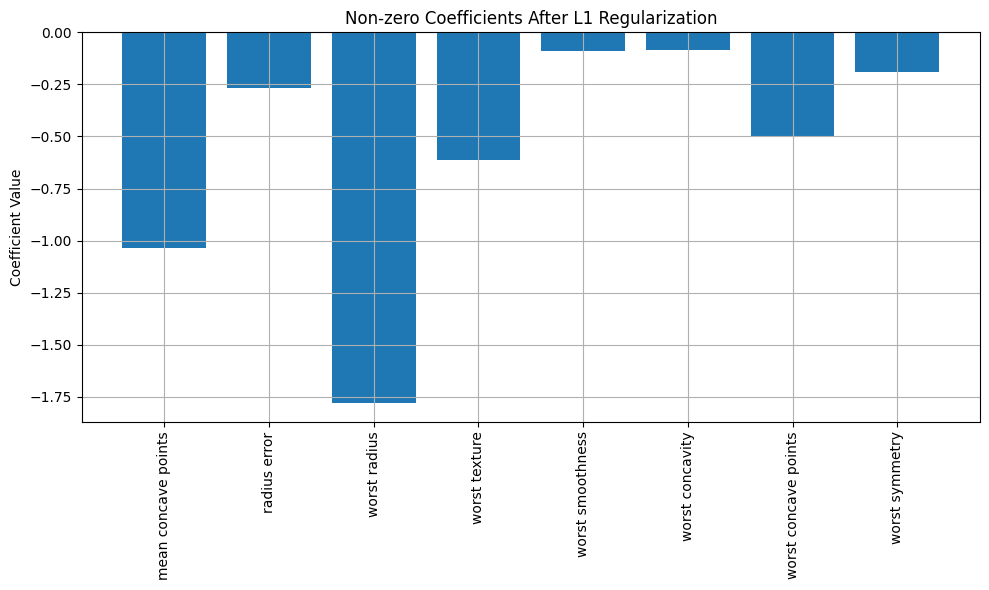


Test Accuracy: 0.977


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Step 1: Load dataset
data = load_breast_cancer()
X, y = data.data, data.target
feature_names = data.feature_names

# Step 2: Train-test split and standardization
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 3: L1 Regularized Logistic Regression
logreg_l1 = LogisticRegression(penalty='l1', solver='liblinear', C=0.1)  # smaller C = stronger regularization
logreg_l1.fit(X_train_scaled, y_train)

# Step 4: Print coefficients
coefficients = logreg_l1.coef_[0]
print("Feature Coefficients (L1 Regularization):")
for name, coef in zip(feature_names, coefficients):
    print(f"{name:30s}: {coef:.4f}")

# Step 5: Plot non-zero coefficients
non_zero_indices = np.where(coefficients != 0)[0]
plt.figure(figsize=(10, 6))
plt.bar([feature_names[i] for i in non_zero_indices], coefficients[non_zero_indices])
plt.xticks(rotation=90)
plt.title("Non-zero Coefficients After L1 Regularization")
plt.ylabel("Coefficient Value")
plt.tight_layout()
plt.grid(True)
plt.show()

# Step 6: Model accuracy
acc = logreg_l1.score(X_test_scaled, y_test)
print(f"\nTest Accuracy: {acc:.3f}")
